# Part I : Quel(le) data scientist êtes-vous ?
## Contexte de l’analyse



A partir d'un dataset de Kaggle, vous réaliserez :
- un clustering non supervisé afin d'identifier 2 groupes de profils techniques distinctes
- une prédiction des profils dont le métier n'est pas labellisé


## Données
data.csv contient 6 variables : 
    - 'Entreprise' correspond à une liste d'entreprises fictive
    - 'Metier' correspond au métier parmi data scientist, lead data scientist, data engineer et data architecte
    - 'Technologies' correspond aux compétences maîtrisées par le profil
    - 'Diplome' correspond à son niveau scolaire (Bac, Master, PhD,...)
    - 'Experience' correspond au nombre d'années d'expériences
    - 'Ville' correspond au lieu de travail
    


## Répondez aux questions 



In [ ]:
# Import des libraries classique (numpy, pandas, ...)
import pandas as pd
import numpy as np
import re
import sklearn as sk
import seaborn as sb
from matplotlib import pyplot as plt
plt.style.use('ggplot')

### 1) Importer le tableau de données dans un dataframe 

In [ ]:
# Import du dataframe "data.csv"
df = pd.read_csv("data.csv", sep=',')
print(df.dtypes)
df.head(10)
df.info()

Entreprise      object
Metier          object
Technologies    object
Diplome         object
Experience      object
Ville           object
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9582 entries, 0 to 9581
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Entreprise    9565 non-null   object
 1   Metier        9563 non-null   object
 2   Technologies  9582 non-null   object
 3   Diplome       9582 non-null   object
 4   Experience    9488 non-null   object
 5   Ville         9582 non-null   object
dtypes: object(6)
memory usage: 449.3+ KB


on a 6 features de type Object


### 2) Combien y a t-il d'observations dans ce dataset? Y a t-il des valeurs manquantes? 

In [ ]:
print(df.shape)
# Il y a 9582 observations
df.isnull().sum()
### Oui. c'est indiqué devant chaque colonne le nombre de valeurs manquantes

(9582, 6)


Entreprise      17
Metier          19
Technologies     0
Diplome          0
Experience      94
Ville            0
dtype: int64

### 3) Réaliser l'imputation des valeurs manquantes pour la variable "Experience" avec : 
- la valeur médiane pour les data scientists
- la valeur moyenne pour les data engineers

In [ ]:
df['Experience'] = df["Experience"].apply(lambda x: float(re.sub(',','.',x)) if isinstance(x,str) else x) ## On utilise une lambda Function pour chnager le sep de décimaux et changer le type en float
print(df.dtypes) ## Vérifier que le changement a été fait

### Calcul Median & Mean

median = df[df.Metier=='Data scientist']['Experience'].dropna().median()
mean_data_engineer = df[df.Metier=='Data engineer']['Experience'].dropna().mean()
## J'ai choisi de considérer la moyenne pour les deux autres métiers
mean_data_architecte = df[df.Metier=='Data architecte']['Experience'].dropna().mean()
mean_Lead_data_sc = df[df.Metier=='Lead data scientist']['Experience'].dropna().mean()
### Fillna: remplir les valeurs vides
df.loc[df.Metier=='Data scientist','Experience'] = df.loc[df.Metier=='Data scientist','Experience'].fillna(median)
df.loc[df.Metier=='Data engineer','Experience'] = df.loc[df.Metier=='Data engineer','Experience'].fillna(mean_data_engineer)
df.loc[df.Metier=='Data architecte','Experience'] = df.loc[df.Metier=='Data architecte','Experience'].fillna(mean_data_architecte)
df.loc[df.Metier=='Lead data scientist','Experience'] = df.loc[df.Metier=='Lead data scientist','Experience'].fillna(mean_Lead_data_sc)

df.isnull().sum()


Entreprise       object
Metier           object
Technologies     object
Diplome          object
Experience      float64
Ville            object
dtype: object


Entreprise      17
Metier          19
Technologies     0
Diplome          0
Experience       0
Ville            0
dtype: int64

**On a bien aucune valeur vide pour Expérience**




### 4) Combien d'années d'expériences ont, en moyenne, chacun des profils : le data scientist, le lead data scientist et le data engineer en moyenne?

In [ ]:
L = df.groupby('Metier')["Experience"].mean()
L


Metier
Data architecte        3.000476
Data engineer          2.984959
Data scientist         2.241268
Lead data scientist    3.965261
Name: Experience, dtype: float64

### 5) Faire la représentation graphique de votre choix afin de comparer le nombre moyen d'années d'expériences pour chaque métier

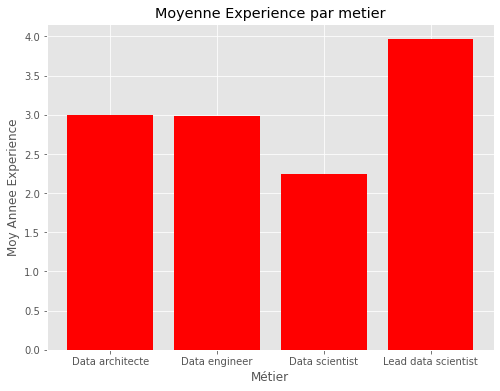

In [ ]:
plt.figure(figsize=(8,6))
y = L.to_numpy()
x = L.index.to_numpy()
plt.bar(x,y, color = 'r')
plt.xlabel("Métier")
plt.ylabel('Moy Annee Experience')
plt.title('Moyenne Experience par metier')
plt.show()

### 6) Transformer la variable continue 'Experience' en une nouvelle variable catégorielle 'Exp_label' à 4 modalités: débutant, confirmé, avancé et expert
- Veuillez expliquer votre choix du règle de transformation.  

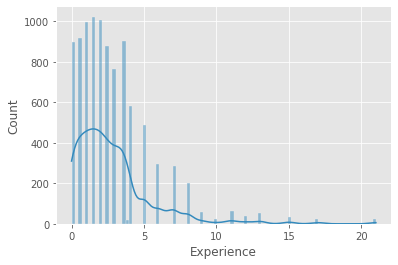

In [ ]:
sb.histplot(df["Experience"], kde=True)


Text(0.5, 1.0, 'Frequence de libellé de Exp')

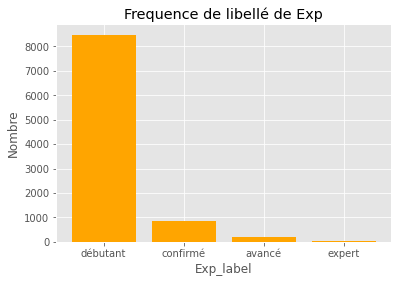

In [ ]:
df['Exp_label'] = pd.cut(df['Experience'],bins=4, labels=['débutant', 'confirmé', 'avancé', 'expert'])
y = df['Exp_label'].value_counts().values
x = df['Exp_label'].value_counts().index
plt.bar(x,y, color = 'orange')
plt.xlabel("Exp_label")
plt.ylabel('Nombre')
plt.title('Frequence de libellé de Exp')


### 7) Quelles sont les 5 technologies les plus utilisées? Faites un graphique

0     0             Matlab
      1             Python
      2            Pyspark
      3       Scikit-learn
      4         Tensorflow
                ...       
9580  3    Microsoft Azure
9581  0                VBA
      1             Python
      2              Excel
      3                  R
Length: 43712, dtype: object

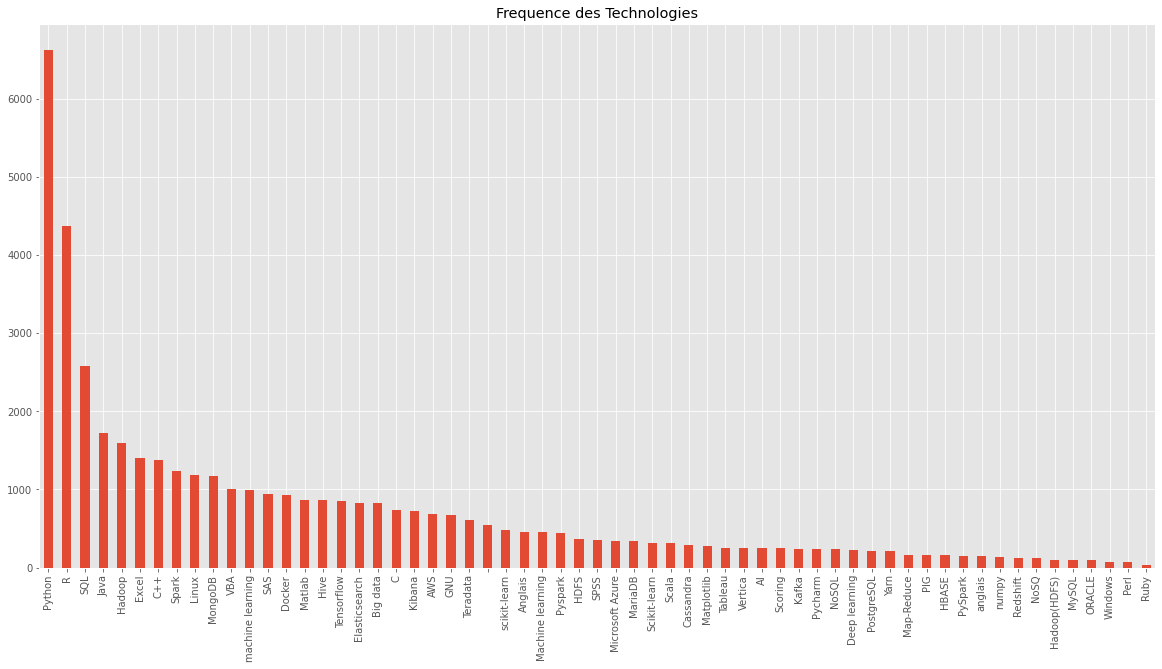

In [ ]:
### voici les top 5 Technologies avec le nombre de fois d'apparition
plt.figure(figsize=(20,10))
All_Tech = pd.DataFrame(df['Technologies'].str.split('/').to_list()).stack()
All_Tech.value_counts().plot(kind='bar')
plt.title('Frequence des Technologies')
All_Tech.value_counts()[0:5]
### Voici les Top 5 des Techniques utilisées
All_Tech

### 8) Réaliser une méthode de clustering non supervisée de votre choix pour faire apparaître 2 clusters que vous jugerez pertinents. 
 les caractéristiques de chacun des clusters.
-  Justifier la performance de votre algorithme grace à une métrique.
-  Interpréter votre resultat.  

Comme Diplome est une donnée ordinale j'ai choisi de l'encoder de cette manière.
J'aurais pu choisir également ordinal encoder

In [ ]:
df_exp = pd.DataFrame()
df_exp['Experience'] = df.dropna()['Experience']
X = df_exp['Experience'].to_numpy()
X = np.reshape(X,(-1,1))

On va utiliser K-means car il permet de fixer le nombre des clusters au préalable. On initialise à l'aide de k-means++ pour prendre les deuxième centroide le plus loin possible et non pas aléatoirement.

In [ ]:
#from sklearn.preprocessing import StandardScaler 
from sklearn.cluster import KMeans 

#X = StandardScaler().fit_transform(X) 
km = KMeans(n_clusters = 2, init="k-means++", random_state=0).fit(X)
labels = km.labels_
c1, c2 = km.cluster_centers_
df_exp['Cluster'] = pd.Series(labels,index=df_exp.index)
Y = df_exp['Cluster'].to_numpy()

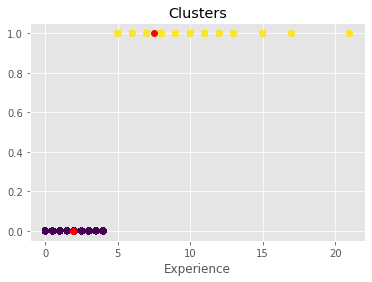

In [ ]:
plt.scatter(X, Y, c =Y)
plt.xlabel('Experience')
plt.title('Clusters')
plt.plot(c1,0,marker="o", c = 'r')
plt.plot(c2,1,marker="o", c = 'r')
### On visualise les centroides


In [ ]:
### Metrics 
km.inertia_ #Inertia qui est la somme de la moyenne des distances de chaque points par rapport à son centroide.
distortion = km.inertia_/len(df_exp)## Distortion c'est la moyenne d'Inertia

Le Graphe montre deux clusters: le jaune représente les personnes les plus expérimentées et le violet représente les moins expérimentés(< 5 à peu près)


J'ai pensé à visualiser d'autres clusters comme celui qui me permet de de ségmenter la dataset par rapport au Technologies ce qui permet d'identifier deux clusters selon les métiers (Metier de Data Science ou pas)
Mais j'ai eu comme contrainte les valeurs catégoriques même avec l'encoding j'ai pas réussi à avoir de bons résultats car c'est compliquer de faire l'encoding de Technologies en tant que données ordinale.

J'ai également envisagé d'utiliser les similarités entre les lignes en utilisant les matrices de distances. Ici la contrainte est principalement que je dois utiliser un algorithme comme DBSCAN et du coup je ne peux pas fixer le nombre de cluster à 2.

### 9) Réaliser la prédiction des métiers manquants dans la base de données par l'algorithme de votre choix

-  Justifier la performance de votre algorithme grace à une métrique.
-  Interpréter votre resultat.  

In [ ]:
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report ## Métriques

In [ ]:
### On va utilser un encoder car les données sont catégoricales
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
 
### Fonction d'encoding: 
def encoding(df):
  df_enc = pd.DataFrame()
  a = label_encoder.fit_transform(df.iloc[:,0])
  df_enc['Ent_enc'] = pd.Series(a)
  a = label_encoder.fit_transform(df.iloc[:,1])
  mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
  df_enc['Metier_enc'] = pd.Series(a)
  print(mapping)
  a = label_encoder.fit_transform(df.iloc[:,2])
  df_enc['Tech_enc'] = pd.Series(a)
  a = label_encoder.fit_transform(df.iloc[:,5])
  df_enc['Ville_enc'] = pd.Series(a)
  df_enc['Experience'] = df['Experience']
  return df_enc


def encoding_diploma(x):
  if x == "No diploma":
    return 0
  elif x == "Bachelor":
    return 1 
  elif x == "Master":
    return 2
  else:
    return 3 

In [ ]:
df_enc = encoding(df.dropna())
df_enc['Diplome_enc']= df.dropna()['Diplome'].apply(lambda x : encoding_diploma(x))
df_enc

{'Data architecte': 0, 'Data engineer': 1, 'Data scientist': 2, 'Lead data scientist': 3}


,Ent_enc,Metier_enc,Tech_enc,Ville_enc,Experience,Diplome_enc
0,1075,2,27,8,1.0,2.0
1,797,0,34,4,3.0,2.0
2,401,3,51,6,3.0,2.0
3,99,2,2,4,1.5,2.0
4,120,2,26,0,2.0,3.0
...,...,...,...,...,...,...
9541,797,2,1,3,0.0,3.0
9542,284,2,9,13,2.0,0.0
9543,157,2,48,8,0.0,2.0
9544,1177,2,37,9,0.5,0.0


In [ ]:
X = df_enc.drop(columns=["Metier_enc","Ville_enc"], axis=1)
Y = df_enc["Metier_enc"] ## Target feature
### Entrainement du modèle
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, stratify=Y, random_state=0)
model = xgb.XGBClassifier(objective="multi:softprob", random_state=0)## XGBoost Classifier
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)
### Métriques
print('Précision du modèle :',accuracy_score(Y_test, Y_pred),'%','\n')
print('Recap de classification','\n' ,classification_report(Y_test, Y_pred))
print('Matrice de confusion','\n',confusion_matrix(Y_test, Y_pred))

Précision du modèle : 0.8659685863874346 % 

Recap de classification 
               precision    recall  f1-score   support

           0       1.00      0.92      0.96       212
           1       0.96      1.00      0.98       234
           2       0.78      0.97      0.86       386
           3       0.68      0.19      0.29       123

    accuracy                           0.87       955
   macro avg       0.85      0.77      0.77       955
weighted avg       0.86      0.87      0.84       955

Matrice de confusion 
 [[195   9   8   0]
 [  0 234   0   0]
 [  0   0 375  11]
 [  0   0 100  23]]


On remarque que Leader data scientist est généralement prédit en tant que Data scientist ce qui fait que le recall de Leader Data scientist est faible.

In [ ]:
###Prédire les métiers manquants
Metier_à_pred = df[df.Metier.isnull()]
exp = Metier_à_pred['Experience'].to_numpy()
df_pred = encoding(Metier_à_pred)

X_à_pred = df_pred.drop(columns= ['Metier_enc','Experience'])
X_à_pred = np.hstack((X_à_pred, exp.reshape(19,1)))
X_à_pred = pd.DataFrame(X_à_pred, columns=X_train.columns)

Y_pred = model.predict(X_à_pred)
indices = X_à_pred.index
Y_pred

{nan: 0}


array([2, 1, 1, 2, 1, 1, 0, 0, 1, 0, 2, 0, 2, 0, 0, 2, 2, 0, 2])

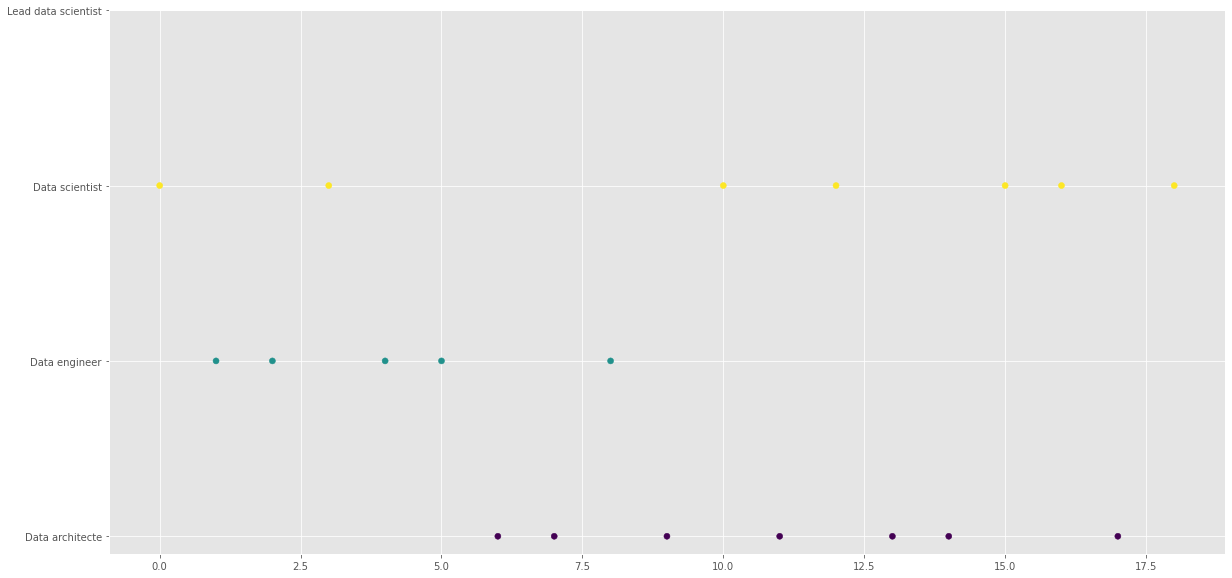

In [ ]:
plt.figure(figsize=(20,10))
mapping = ['Data architecte', 'Data engineer', 'Data scientist', 'Lead data scientist'] ## à partir du mapping fourni ci-dessus
plt.scatter(indices,Y_pred, c=Y_pred)
plt.yticks(ticks =[0,1,2,3] , labels = mapping)
plt.show()

Certaines données prédites en Data scientist sont censées être en Lead Data scientist.